In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

plt.style.use("ggplot")
sns.set_palette("Set2")


In [2]:
df = pd.read_csv("C:\\Users\\Prasad\\OneDrive\\Desktop\\UPGRAD\\EV_Price_Predictor\\Cheapestelectriccars-EVDatabase 2023.csv")

In [4]:
df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7 sec,270 km/h,645 km,183 Wh/km,820 km/h,All Wheel Drive,5,"€218,000",NaN
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260 km/h,400 km,209 Wh/km,980 km/h,All Wheel Drive,4,"€189,668","£142,400"
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250 km/h,405 km,210 Wh/km,1000 km/h,All Wheel Drive,4,"€146,050","£115,000"
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4 sec,135 km/h,315 km,165 Wh/km,230 km/h,Front Wheel Drive,5,"€36,840",NaN
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0 sec,160 km/h,285 km,182 Wh/km,360 km/h,Rear Wheel Drive,5,NaN,NaN


In [11]:
print(df.columns.tolist())

['Name', 'Subtitle', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany', 'PriceinUK']


# Data Cleaning

In [8]:
# Removing Extra Spaces
df.columns = df.columns.str.strip()

In [ ]:

print(df1.columns.tolist())

In [13]:
#filling empty data with 0
df=df.fillna('0')

In [17]:

#df['Manufacturer'] = df.Name.str.split(' ', 1, expand=True)[0] __ Tried to extract manufacturer from "Name" Column

df[['Manufacturer', 'Model']] = df['Name'].str.split(' ', n=1, expand=True)
df['Model'] = df['Model'].fillna('')

In [43]:
#Getting all values in numerical form by removing currency sign and units

df['PriceinUK'] = (
    df['PriceinUK']
    .astype(str)             
    .str.replace("£","", regex=False)
    .str.replace(",","", regex=False)
    .str.replace("Â","", regex=False)
    .astype(float)           
)
     

df['PriceinGermany'] = (
    df['PriceinGermany']
    .astype(str)                             
    .str.replace("€","", regex=False)          
    .str.replace(",","", regex=False)
    .str.replace("Â","", regex=False)
    .replace("", np.nan)                     
    .astype(float)                           
)
     

df['FastChargeSpeed'] = (
    df['FastChargeSpeed'].astype(str)
    .str.replace(' km/h','', regex=False)
    .str.replace('-','0', regex=False)
    .astype(float)
)

df['Efficiency'] = (
    df['Efficiency'].astype(str)
    .str.replace(' Wh/km','', regex=False)
    .astype(float)
)

df['Range'] = (
    df['Range'].astype(str)
    .str.replace(' km','', regex=False)
    .astype(float)
)

df['TopSpeed'] = (
    df['TopSpeed'].astype(str)
    .str.replace(' km/h','', regex=False)
    .astype(float)
)

df['Acceleration'] = (
    df['Acceleration'].astype(str)
    .str.replace(' sec','', regex=False)
    .astype(float)
)

KWH = []
for item in df['KWH']:
    text = str(item)

    match = re.search(r'\d+', text)
    
    if match:
        KWH.append(int(match.group()))
    else:
        KWH.append(None)



In [44]:
df.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer,Model,Battery_kWh
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7,270.0,645.0,183.0,820.0,All Wheel Drive,5,218000.0,0.0,Lucid,Air Dream Edition P,118.0
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8,260.0,400.0,209.0,980.0,All Wheel Drive,4,189668.0,142400.0,Porsche,Taycan Turbo S,83.7
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3,250.0,405.0,210.0,1000.0,All Wheel Drive,4,146050.0,115000.0,Audi,e-tron GT RS,85.0
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4,135.0,315.0,165.0,230.0,Front Wheel Drive,5,36840.0,0.0,Renault,Zoe ZE50 R110,52.0
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0,160.0,285.0,182.0,360.0,Rear Wheel Drive,5,0.0,0.0,Audi,Q4 e-tron 35,52.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             309 non-null    object 
 1   KWH              309 non-null    object 
 2   Acceleration     309 non-null    float64
 3   TopSpeed         309 non-null    float64
 4   Range            309 non-null    float64
 5   Efficiency       309 non-null    float64
 6   FastChargeSpeed  309 non-null    float64
 7   Drive            309 non-null    object 
 8   NumberofSeats    309 non-null    int64  
 9   PriceinGermany   309 non-null    float64
 10  PriceinUK        309 non-null    float64
 11  Manufacturer     309 non-null    object 
 12  Model            309 non-null    object 
 13  Battery_kWh      309 non-null    float64
dtypes: float64(8), int64(1), object(5)
memory usage: 33.9+ KB


# EDA

<Axes: xlabel='Drive', ylabel='count'>

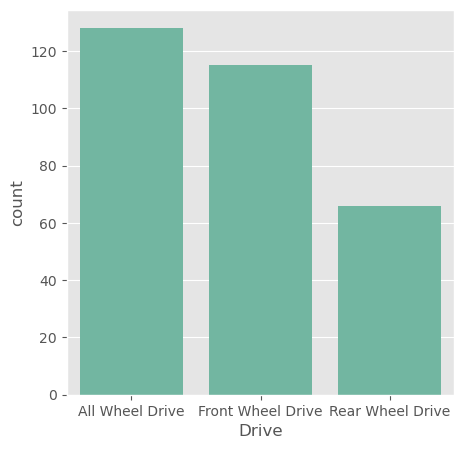

In [51]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'Drive', data = df)

<Axes: xlabel='NumberofSeats', ylabel='count'>

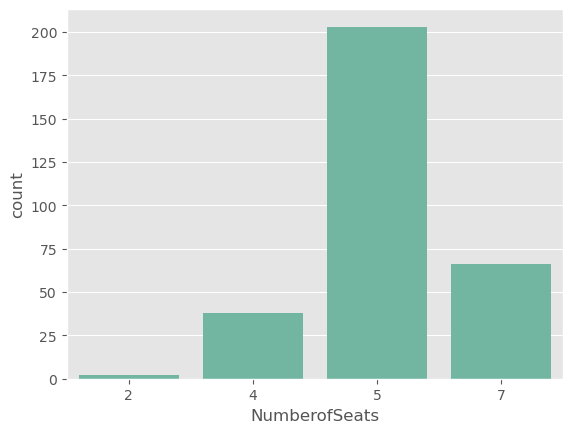

In [52]:
# Count of Cars According to Seats
sns.countplot(x = 'NumberofSeats', data = df)

#### Majority of EVs are 5-seaters, reflecting the standard passenger car market.
#### A smaller proportion are 2-seaters (sports cars) and 7-seaters (SUVs/MPVs).
### Conclusion: The EV market is still family-focused (5-seaters dominate), with niche sports and large SUVs as smaller segments.

<Axes: xlabel='NumberofSeats', ylabel='count'>

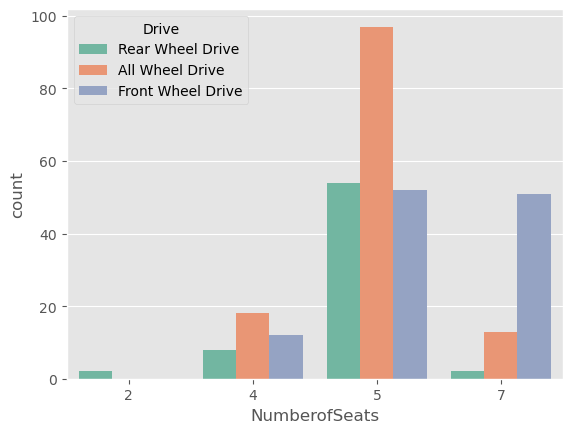

In [55]:
#Drive_type againts Number of seats
sns.countplot(x = 'NumberofSeats', hue='Drive', data=df)

<Axes: xlabel='count', ylabel='Manufacturer'>

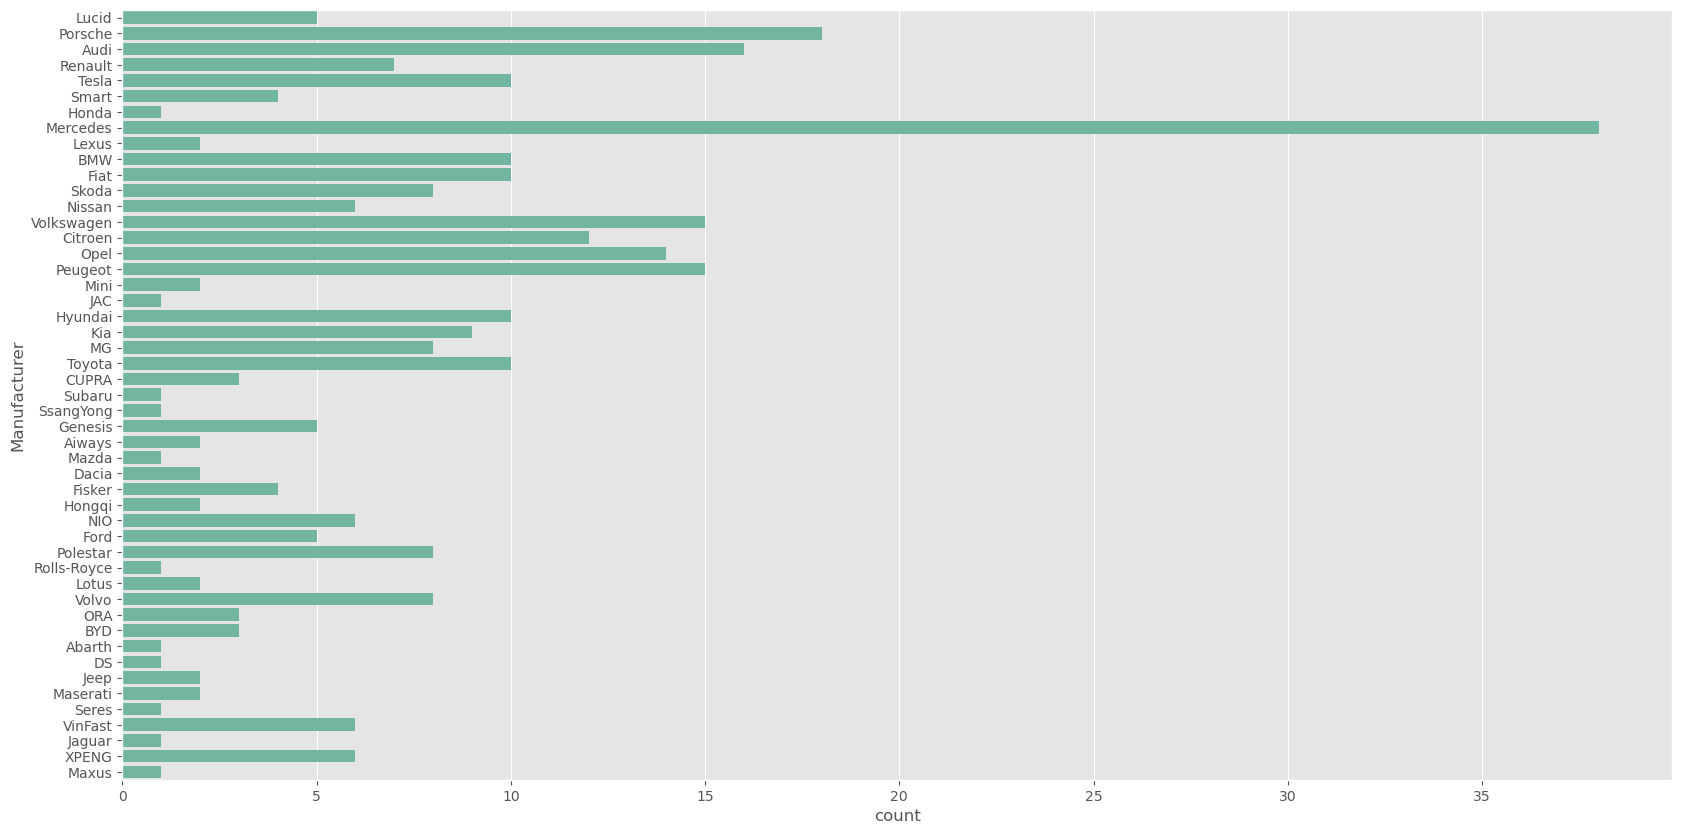

In [58]:
plt.figure(figsize=(20,10))
sns.countplot(y = 'Manufacturer', data = df)

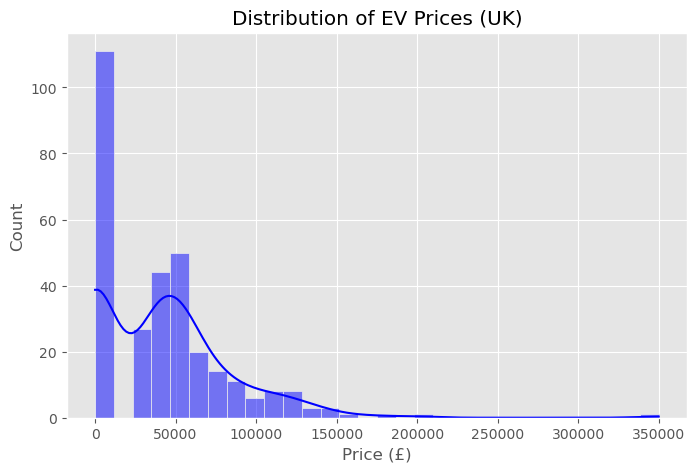

In [59]:
# Business Objectives
# Objective 1: Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['PriceinUK'], bins=30, kde=True, color="blue")
plt.title("Distribution of EV Prices (UK)")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.show()

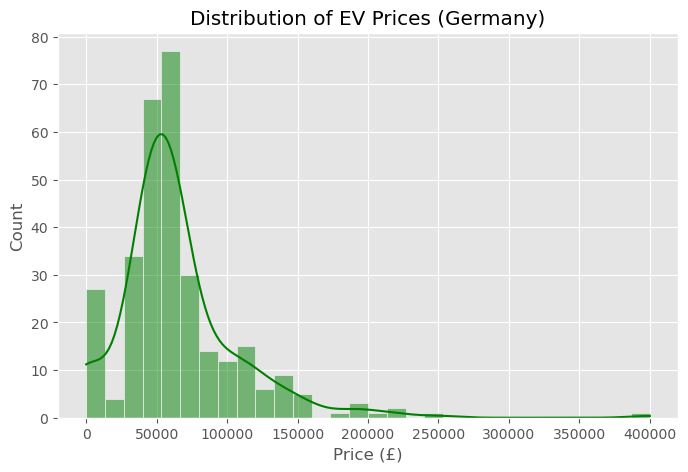

In [62]:
plt.figure(figsize=(8,5))
sns.histplot(df['PriceinGermany'], bins=30, kde=True, color="green")
plt.title("Distribution of EV Prices (Germany)")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.show()

##### Price distribution shows a wide variance:
#### Budget EVs: ~€30k–40k
#### Mid-tier EVs: ~€50k–80k
#### Premium EVs: €100k+
#### Conclusion: EV market has a clear segmentation — budget, mid-range, and luxury. Europe’s EV adoption covers all segments, with Germany showing a wider premium market.

In [ ]:
#Objective 2: Top 10 Longest Range EVs

C:\Users\Prasad\AppData\Local\Temp\ipykernel_32124\3988609703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Range", y="Model", data=top_range, palette="Blues_r")


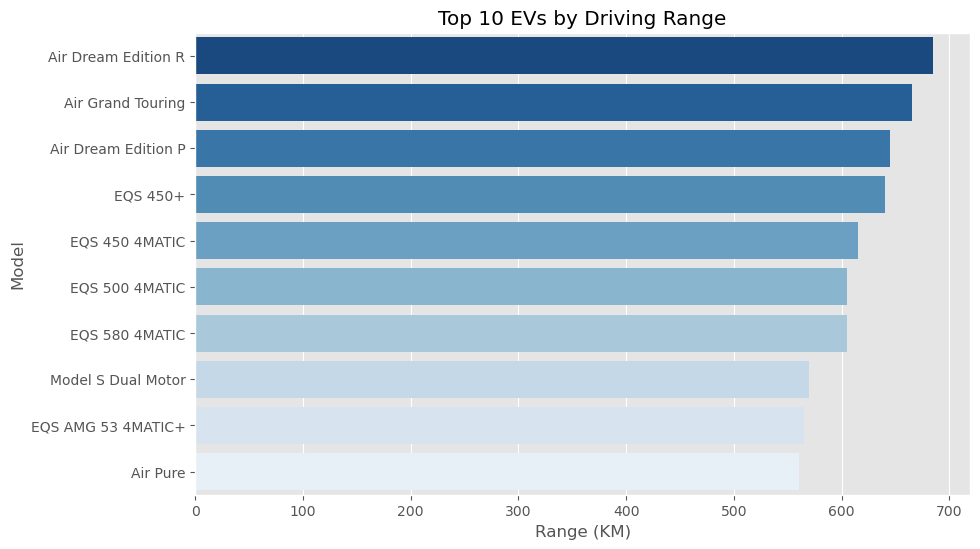

In [65]:

top_range = df.sort_values(by="Range", ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x="Range", y="Model", data=top_range, palette="Blues_r")
plt.title("Top 10 EVs by Driving Range")
plt.xlabel("Range (KM)")
plt.ylabel("Model")
plt.show()

#### Most EVs fall between 250–500 km range.
#### Ultra-high ranges (600+ km) are rare.
#### Conclusion: Mainstream EVs balance affordability and range, but top-tier models (Lucid, Mercedes EQS) dominate the 600+ km category.

# Objective 4: Efficiency of EVs


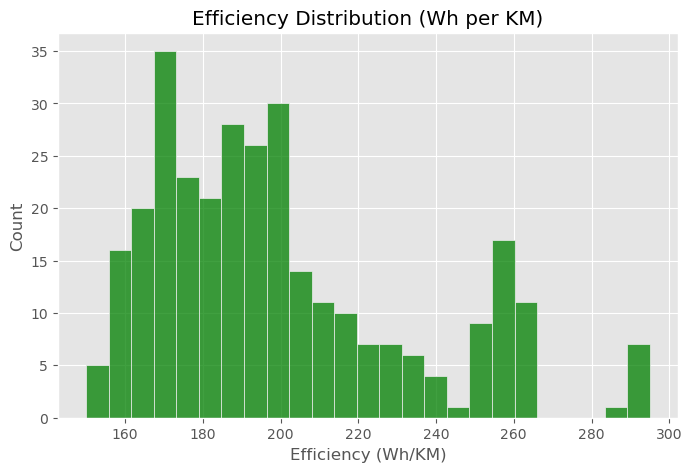

In [73]:

plt.figure(figsize=(8,5))
sns.histplot(df['Efficiency'], bins=25, color="green")
plt.title("Efficiency Distribution (Wh per KM)")
plt.xlabel("Efficiency (Wh/KM)")
plt.ylabel("Count")
plt.show()

#### Efficiency values mostly between 150–220 Wh/km.

#### More efficient EVs (lower Wh/km) tend to be compact hatchbacks, while high-performance sports EVs consume more energy.
### Conclusion: Efficiency strongly depends on vehicle class — small EVs are more energy-efficient, sports EVs trade efficiency for performance.

# Objective 5: Fast Charging Speed vs Price


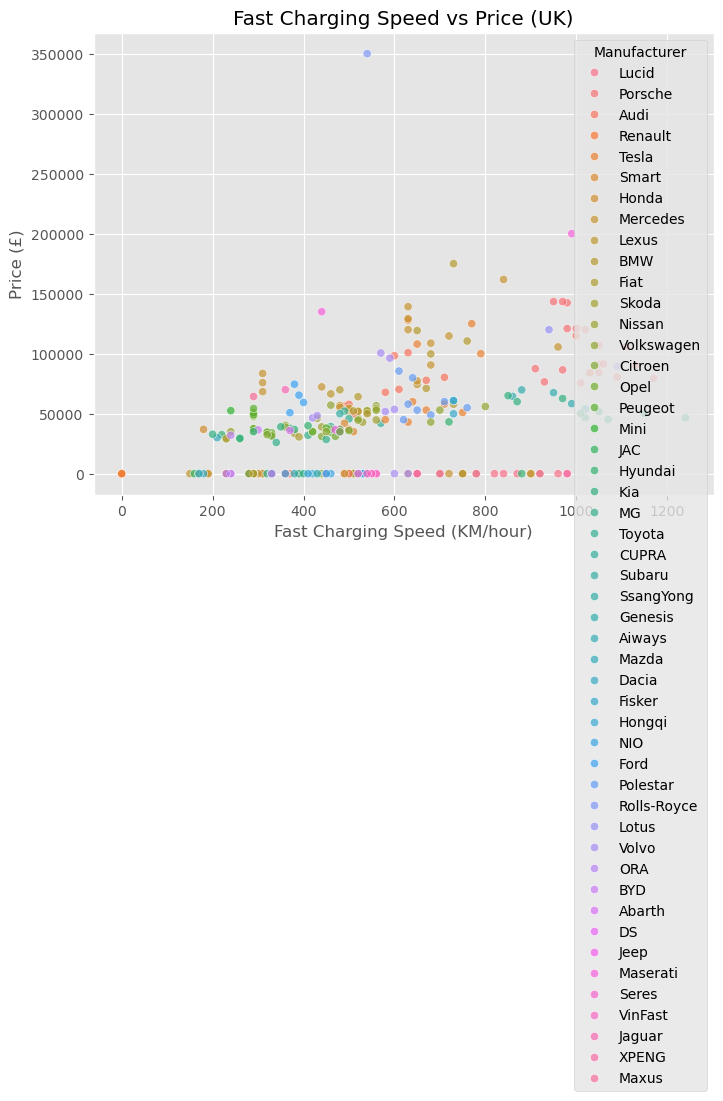

In [78]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="FastChargeSpeed", y="PriceinUK", data=df, hue = "Manufacturer",alpha=0.7)
plt.title("Fast Charging Speed vs Price (UK)")
plt.xlabel("Fast Charging Speed (KM/hour)")
plt.ylabel("Price (£)")
plt.show()